In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
from sklearn.ensemble import IsolationForest

In [2]:
j13 = pd.read_csv("journal13.csv", index_col=0)
j14 = pd.read_csv("journal14.csv", index_col=0)

In [4]:
j14["Effective date"].max()

'2014-12-31'

In [3]:
#j13 = pd.read_excel("ABC 2013 JEs.xlsx")

In [3]:
j13.head()

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,...,Functional currency code,Business unit code,Business unit,Preparer ID,Preparer department,JE line description,Approver ID,Reversal Indicator,DOW_entry_date,DOW_effective_date
0,2013-0001-0210000003,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
1,2013-0001-0210000003,2,60000113,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
2,2013-0001-0210000003,3,20001102,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
3,2013-0001-0210000006,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,JE Line Description1,EY EMPTY,N,0,4
4,2013-0001-0210000006,2,60000112,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4


In [53]:
j13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384008 entries, 0 to 384007
Data columns (total 21 columns):
JE number                   384008 non-null object
JE line number              384008 non-null int64
GL account code             384008 non-null int64
Fiscal year                 384008 non-null int64
Fiscal period               384008 non-null int64
Effective date              384008 non-null object
Entry date                  384008 non-null object
Source code                 384008 non-null object
Source                      384008 non-null object
Source group                384008 non-null object
Functional amount           384008 non-null float64
Functional currency code    384008 non-null object
Business unit code          384008 non-null int64
Business unit               384008 non-null object
Preparer ID                 384008 non-null object
Preparer department         384008 non-null object
JE line description         89207 non-null object
Approver ID                

In [56]:
df.loc[:,"Reversal Indicator"].value_counts()

N    732319
Y      2304
Name: Reversal Indicator, dtype: int64

In [4]:
#j14 = pd.read_excel("ABC 2014 JEs.xlsx")

In [6]:
j14.head()

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,...,Functional currency code,Business unit code,Business unit,Preparer ID,Preparer department,JE line description,Approver ID,Reversal Indicator,DOW_entry_date,DOW_effective_date
0,2014-0001-0210000003,1,60000001,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,2,2
1,2014-0001-0210000003,2,60000112,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,2,2
2,2014-0001-0210000003,3,60000112,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,2,2
3,2014-0001-0210000003,4,60000112,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,2,2
4,2014-0001-0210000003,5,60000112,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,2,2


**2013 sowie 2014 sind die Abweichungen der Summen von 0 bei den jeweiligen Journalnummern vernachlässigbar:**

In [5]:
sums13 = j13.groupby("JE number").aggregate({"Functional amount": sum})

In [6]:
sums13 = j13.groupby("JE number").aggregate({"Functional amount": sum})
all(np.abs(sums13["Functional amount"]) < 1e-7)

True

In [7]:
sums14 = j14.groupby("JE number").aggregate({"Functional amount": sum})
all(np.abs(sums14["Functional amount"]) < 1e-7)

True

**Wochentage**

Effective date= Buchungsdatum  

Entry date= Belegdatum

In [12]:
#j13['DOW_entry_date'] = j13["Entry date"].dt.dayofweek
#j13['DOW_effective_date'] = j13["Effective date"].dt.dayofweek

In [6]:
#j14['DOW_entry_date'] = j14["Entry date"].dt.dayofweek
#j14['DOW_effective_date'] = j14["Effective date"].dt.dayofweek

**Folgende Variablen beinhalten keine Informationen:**

Functional currency code         
Business unit code               
Business unit                    
Approver ID

In [13]:
j13.apply('nunique')

Unnamed: 0                  384008
JE number                   110285
JE line number                 634
GL account code                475
Fiscal year                      1
Fiscal period                   12
Effective date                 364
Entry date                     384
Source code                     74
Source                          74
Source group                    14
Functional amount           177204
Functional currency code         1
Business unit code               1
Business unit                    1
Preparer ID                     42
Preparer department              7
JE line description            264
Approver ID                      1
Reversal Indicator               2
DOW_entry_date                   7
DOW_effective_date               7
dtype: int64

In [8]:
j14.apply('nunique')

JE number                    98823
JE line number                 246
GL account code                476
Fiscal year                      1
Fiscal period                   12
Effective date                 363
Entry date                     386
Source code                     78
Source                          78
Source group                    15
Functional amount           176453
Functional currency code         1
Business unit code               1
Business unit                    1
Preparer ID                     48
Preparer department              9
JE line description            264
Approver ID                      1
Reversal Indicator               2
DOW_entry_date                   7
DOW_effective_date               7
dtype: int64

In [9]:
# j13.to_csv("journal13.csv")
# j14.to_csv("journal14.csv")

In [14]:
df = pd.concat([j13, j14])

In [8]:
df.head()

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,...,Functional currency code,Business unit code,Business unit,Preparer ID,Preparer department,JE line description,Approver ID,Reversal Indicator,DOW_entry_date,DOW_effective_date
0,2013-0001-0210000003,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
1,2013-0001-0210000003,2,60000113,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
2,2013-0001-0210000003,3,20001102,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
3,2013-0001-0210000006,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,JE Line Description1,EY EMPTY,N,0,4
4,2013-0001-0210000006,2,60000112,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4


In [4]:
df.drop(["Functional currency code", "Business unit code", "Business unit", "Approver ID"], axis=1, inplace=True)

**Es ist eine Aktivität an Sonntagen zu beobachten:**

In [11]:
dow_counts = df.groupby("Fiscal year").aggregate({"DOW_entry_date": "value_counts", "DOW_effective_date": "value_counts"})
dow_counts.index.set_levels([[2013, 2014], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']], inplace=True)

In [12]:
dow_counts

DOW_entry_date  DOW_effective_date
2013 Mon           74786               70403
     Tue           79237               77552
     Wed           75452               73589
     Thu           79136               76101
     Fri           67883               70014
     Sat            5638               10752
     Sun            1876                5597
2014 Mon           65311               62390
     Tue           71881               68085
     Wed           70266               68936
     Thu           69892               64150
     Fri           66239               74523
     Sat            5348                6846
     Sun            1678                5685

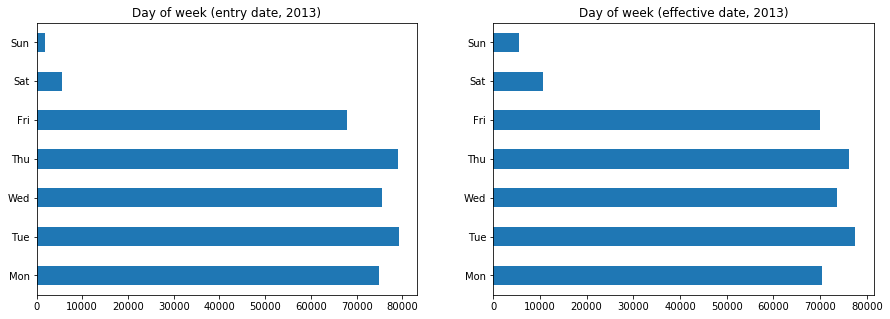

In [13]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
dow_counts.loc[2013, "DOW_entry_date"].plot(kind="barh", title="Day of week (entry date, 2013)", ax=axes[0])
dow_counts.loc[2013, "DOW_effective_date"].plot(kind="barh", title="Day of week (effective date, 2013)", ax=axes[1])

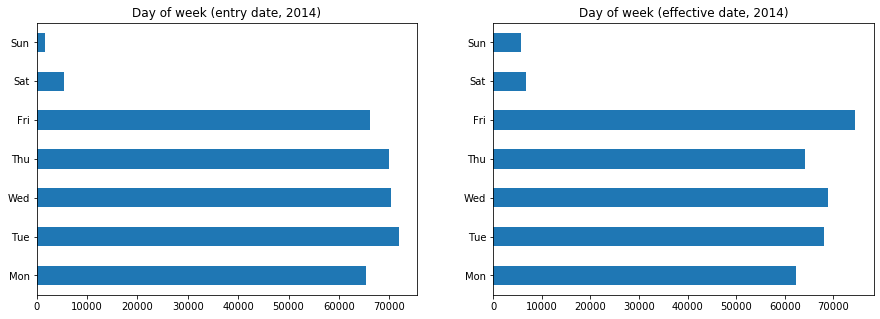

In [14]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
dow_counts.loc[2014, "DOW_entry_date"].plot(kind="barh", title="Day of week (entry date, 2014)", ax=axes[0])
dow_counts.loc[2014, "DOW_effective_date"].plot(kind="barh", title="Day of week (effective date, 2014)", ax=axes[1])

#### Wer bucht am Sonntag?

In [60]:
sunday = df.loc[(df.DOW_effective_date == 6),:].groupby('Fiscal year').\
aggregate({'Source group':'unique', 'Source':'unique', 'GL account code':'unique'})

In [16]:
print('2013 source group: ', len(sunday.loc[2013, 'Source group']))
print(sunday.loc[2013, 'Source group'], '\n')
print('2013 source: ', len(sunday.loc[2013, 'Source']))
print(sunday.loc[2013, 'Source'], '\n')
print('2013 N accounts: ')
print(len(sunday.loc[2013, 'GL account code']), '\n')


print('2014 source group: ', len(sunday.loc[2014, 'Source group']))
print(sunday.loc[2014, 'Source group'], '\n')
print('2014 source: ', len(sunday.loc[2014, 'Source']))
print(sunday.loc[2014, 'Source'], '\n')
print('2014 N accounts: ')
print(len(sunday.loc[2014, 'GL account code']), '\n')

2013 source group:  13
['Fixed assets' 'Purchases' 'Receivables adj' 'Transfers' 'Wages'
 'Accruals' 'GL document' 'Cash out' 'Sales' 'Sales adjustments'
 'Sales manual' 'Goods receipts' 'Cash in'] 

2013 source:  27
['AA-Asset posting' 'FV-Invoice vendors EU' 'FZ-Credit note vendors EU'
 'KD-Service Invoice non-EU' 'FC-Self billing (vendor)'
 'FA-Vendor invoice' 'FB-Vendor credit note' 'EM-Maturity effects'
 'SG-Transfer entry' 'SP-Opening balance' 'SD-Wages & salaries'
 'SE-Provisions' 'SA-G/L account document' 'Z6-Vendor payment home'
 'Z9-Vendors payment foreign' 'EF-Discharge effects' 'CO-Fees'
 'DF-Self billed goods' 'DU-Self billed services non-EU'
 'CA-Customer invoices' 'CU-Invoice EU' 'CY-Invoice non EU'
 'CW-Non EU/Rev.Inv' 'YA-Invoice manual' 'WE-Goods receipt'
 'ZT-Registration Treasury' 'AF-Depreciation posting'] 

2013 N accounts: 
217 

2014 source group:  12
['Purchases' 'Receivables adj' 'GL document' 'Transfers' 'Wages'
 'Accruals' 'Cash out' 'Sales' 'Sales adjustmen

In [67]:
tmp = df.loc[df["Source"] == 'FV-Invoice vendors EU', :].groupby("Effective date").aggregate({"JE number":"nunique", "DOW_effective_date":"first"})

In [68]:
tmp.loc[tmp["DOW_effective_date"] == 6]

,JE number,DOW_effective_date
Effective date,,
2013-03-31,4,6
2013-06-30,6,6
2014-08-31,5,6
2014-11-30,1,6


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734623 entries, 0 to 350614
Data columns (total 17 columns):
JE number              734623 non-null object
JE line number         734623 non-null int64
GL account code        734623 non-null int64
Fiscal year            734623 non-null int64
Fiscal period          734623 non-null int64
Effective date         734623 non-null object
Entry date             734623 non-null object
Source code            734623 non-null object
Source                 734623 non-null object
Source group           734623 non-null object
Functional amount      734623 non-null float64
Preparer ID            734623 non-null object
Preparer department    734623 non-null object
JE line description    184787 non-null object
Reversal Indicator     734623 non-null object
DOW_entry_date         734623 non-null int64
DOW_effective_date     734623 non-null int64
dtypes: float64(1), int64(6), object(10)
memory usage: 120.9+ MB


In [72]:
df.loc[(df.DOW_effective_date == 6) & (df["Effective date"] != df["Entry date"]), :]

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,Functional amount,Preparer ID,Preparer department,JE line description,Reversal Indicator,DOW_entry_date,DOW_effective_date
17333,2013-0001-2000000120,1,40100101,2013,6,2013-06-30,2013-06-26,AA,AA-Asset posting,Fixed assets,5295.62,IrwJa01,Finance&Admin,JE Line Description1,N,2,6
17334,2013-0001-2000000120,2,40107000,2013,6,2013-06-30,2013-06-26,AA,AA-Asset posting,Fixed assets,-5295.62,IrwJa01,Finance&Admin,JE Line Description2,N,2,6
18971,2013-0001-2100001062,1,60000050,2013,3,2013-03-31,2013-04-05,FV,FV-Invoice vendors EU,Purchases,-138438.36,ScoDa01,Finance&Admin,NaN,N,4,6
18972,2013-0001-2100001062,2,140800600,2013,3,2013-03-31,2013-04-05,FV,FV-Invoice vendors EU,Purchases,138438.36,ScoDa01,Finance&Admin,NaN,N,4,6
18973,2013-0001-2100001065,1,60000004,2013,3,2013-03-31,2013-04-05,FV,FV-Invoice vendors EU,Purchases,-400.00,BeaAl01,Finance&Admin,JE Line Description1,N,4,6
18974,2013-0001-2100001065,2,140900501,2013,3,2013-03-31,2013-04-05,FV,FV-Invoice vendors EU,Purchases,400.00,BeaAl01,Finance&Admin,NaN,N,4,6
18975,2013-0001-2100001065,3,20001103,2013,3,2013-03-31,2013-04-05,FV,FV-Invoice vendors EU,Purchases,-84.00,BeaAl01,Finance&Admin,NaN,N,4,6
18976,2013-0001-2100001065,4,20001104,2013,3,2013-03-31,2013-04-05,FV,FV-Invoice vendors EU,Purchases,84.00,BeaAl01,Finance&Admin,NaN,N,4,6
18977,2013-0001-2100001068,1,60000004,2013,3,2013-03-31,2013-04-05,FV,FV-Invoice vendors EU,Purchases,-43279.60,BeaAl01,Finance&Admin,NaN,N,4,6
18978,2013-0001-2100001068,2,60000500,2013,3,2013-03-31,2013-04-05,FV,FV-Invoice vendors EU,Purchases,43279.60,BeaAl01,Finance&Admin,NaN,N,4,6


In [75]:
df.loc[(df.DOW_effective_date == 6) & (df["Effective date"] == df["Entry date"]), :]

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,Functional amount,Preparer ID,Preparer department,JE line description,Reversal Indicator,DOW_entry_date,DOW_effective_date
177414,2013-0001-2300000480,1,20000000,2013,1,2013-01-13,2013-01-13,EF,EF-Discharge effects,Receivables adj,-7806.12,Batch,System,NaN,N,6,6
177415,2013-0001-2300000480,2,20000010,2013,1,2013-01-13,2013-01-13,EF,EF-Discharge effects,Receivables adj,7806.12,Batch,System,NaN,N,6,6
177748,2013-0001-2300000981,1,20000000,2013,1,2013-01-27,2013-01-27,EF,EF-Discharge effects,Receivables adj,-18895.78,Batch,System,NaN,N,6,6
177749,2013-0001-2300000981,2,20000010,2013,1,2013-01-27,2013-01-27,EF,EF-Discharge effects,Receivables adj,18895.78,Batch,System,NaN,N,6,6
178274,2013-0001-2300001770,1,20000000,2013,2,2013-02-17,2013-02-17,EF,EF-Discharge effects,Receivables adj,-3442.98,Batch,System,NaN,N,6,6
178275,2013-0001-2300001770,2,20000010,2013,2,2013-02-17,2013-02-17,EF,EF-Discharge effects,Receivables adj,3442.98,Batch,System,NaN,N,6,6
179248,2013-0001-2300003231,1,20000000,2013,3,2013-03-31,2013-03-31,EF,EF-Discharge effects,Receivables adj,-30767.26,Batch,System,NaN,N,6,6
179249,2013-0001-2300003231,2,20000010,2013,3,2013-03-31,2013-03-31,EF,EF-Discharge effects,Receivables adj,30767.26,Batch,System,NaN,N,6,6
179250,2013-0001-2300003234,1,20000000,2013,3,2013-03-31,2013-03-31,EF,EF-Discharge effects,Receivables adj,-14072.72,Batch,System,NaN,N,6,6
179251,2013-0001-2300003234,2,20000010,2013,3,2013-03-31,2013-03-31,EF,EF-Discharge effects,Receivables adj,14072.72,Batch,System,NaN,N,6,6


**Functional amount**

In [17]:
amount_summary = df.groupby(['Fiscal year', 'DOW_effective_date']).\
aggregate({'Functional amount':['min', 'max', 'mean', 'std', 'median', 'nunique', 'count']})

amount_summary.columns = amount_summary.columns.droplevel(level=0)

amount_summary.rename(columns={
                               'min':'min_amount', 
                               'max':'max_amount', 
                               'mean':'mean_amount', 
                               'std':'std_amount',
                               'median':'median_amount',
                               'nunique':'n_unique_amounts',
                               'count':'count_amount'
                                }, inplace=True)

In [ ]:
# sum all positives, negatives (amount)

In [18]:
amount_summary.round(2)

min_amount   max_amount  mean_amount  \
Fiscal year DOW_effective_date                                          
2013        0                  -90385238.42  90385238.42         -0.0   
            1                  -90000000.00  90000000.00          0.0   
            2                  -28490285.86  28490285.86         -0.0   
            3                  -90000000.00  90000000.00         -0.0   
            4                  -39438328.38  39438328.38         -0.0   
            5                  -46511313.56  48006848.28         -0.0   
            6                  -20973318.32  20973318.32         -0.0   
2014        0                  -69567614.26  69567614.26          0.0   
            1                  -76791233.90  76791233.90          0.0   
            2                  -68000004.00  69398230.90          0.0   
            3                  -76423089.50  76728144.08          0.0   
            4                  -40479732.98  40917323.50          0.0   
            5                  -21596430.32  21596430.32          0.0   
            6                  -21596430.32  21596430.32          0.0   

                                std_amount  median_amount  n_unique_amounts  \
Fiscal year DOW_effective_date                                                
2013        0                   1318540.28          55.36             46036   
            1                    790298.32          59.04             50577   
            2                    318892.24          53.80             47719   
            3                    846813.25          44.40             49710   
            4                    371711.26          48.44             47383   
            5                   1113469.99          23.04              8153   
            6                    855514.71          32.70              4348   
2014        0                    950142.42          87.42             44352   
            1                    858809.38         147.00             48329   
            2                   1073695.63         114.06             48396   
            3                    826181.21          93.94             46329   
            4                    611074.13         120.02             51701   
            5                    921351.15          -0.05              5953   
            6                    782153.56          24.02              4576   

                                count_amount  
Fiscal year DOW_effective_date                
2013        0                          70403  
            1                          77552  
            2                          73589  
            3                          76101  
            4                          70014  
            5                          10752  
            6                           5597  
2014        0                          62390  
            1                          68085  
            2                          68936  
            3                          64150  
            4                          74523  
            5                           6846  
            6                           5685

In [19]:
from collections import Counter

In [20]:
dow = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [22]:
print('The most common functional amounts 2013: ', '\n')
for key, day in dow.items():
    #print(u_value, df.query('DOW_effective_date == @u_value').loc[:, 'Functional amount'].mode())
    print(day)
    data = df.loc[(df.DOW_effective_date == key) & (df['Fiscal year'] == 2013), 'Functional amount']
    c = Counter(data.values)
    for value, counts in c.most_common(3):
        print(value, 'Euro :', counts)
    print('\n')
    

The most common functional amounts 2013:  

Mon
43.68 Euro : 632
37.18 Euro : 550
23.04 Euro : 530


Tue
23.04 Euro : 657
37.18 Euro : 499
-23.04 Euro : 383


Wed
23.04 Euro : 809
59.04 Euro : 608
37.18 Euro : 515


Thu
23.04 Euro : 620
43.68 Euro : 607
37.18 Euro : 472


Fri
37.18 Euro : 535
23.04 Euro : 408
43.68 Euro : 353


Sat
23.04 Euro : 135
43.68 Euro : 118
62.4 Euro : 100


Sun
43.68 Euro : 95
62.4 Euro : 77
37.18 Euro : 54




In [24]:
print('The most common functional amounts 2014: ', '\n')
for key, day in dow.items():
    #print(u_value, df.query('DOW_effective_date == @u_value').loc[:, 'Functional amount'].mode())
    print(day)
    data = df.loc[(df.DOW_effective_date == key) & (df['Fiscal year'] == 2014), 'Functional amount']
    c = Counter(data.values)
    for value, counts in c.most_common(3):
        print(value, 'Euro :', counts)
    print('\n')

The most common functional amounts 2014:  

Mon
-0.2 Euro : 177
0.2 Euro : 176
636.0 Euro : 114


Tue
0.2 Euro : 165
-0.2 Euro : 163
636.0 Euro : 82


Wed
0.2 Euro : 183
-0.2 Euro : 180
424.0 Euro : 95


Thu
-0.2 Euro : 196
0.2 Euro : 192
424.0 Euro : 71


Fri
-0.2 Euro : 269
0.2 Euro : 266
424.0 Euro : 65


Sat
0.4 Euro : 17
66.0 Euro : 15
32.0 Euro : 14


Sun
293.0 Euro : 15
-24.0 Euro : 15
-36.0 Euro : 15




In [15]:
# plt.figure(figsize=(15,8))
# for day in sorted(j13.DOW_effective_date.unique()):
#     data = j13.query("DOW_effective_date == @day")["Functional amount"]
#     sns.kdeplot(data, label=day)
# # wtf is happening with you, seaborn
# # TODO: smth with y axis 

Text(0.5, 0.98, 'Functional amount distribution (day of week), 2013 (y scale log)')

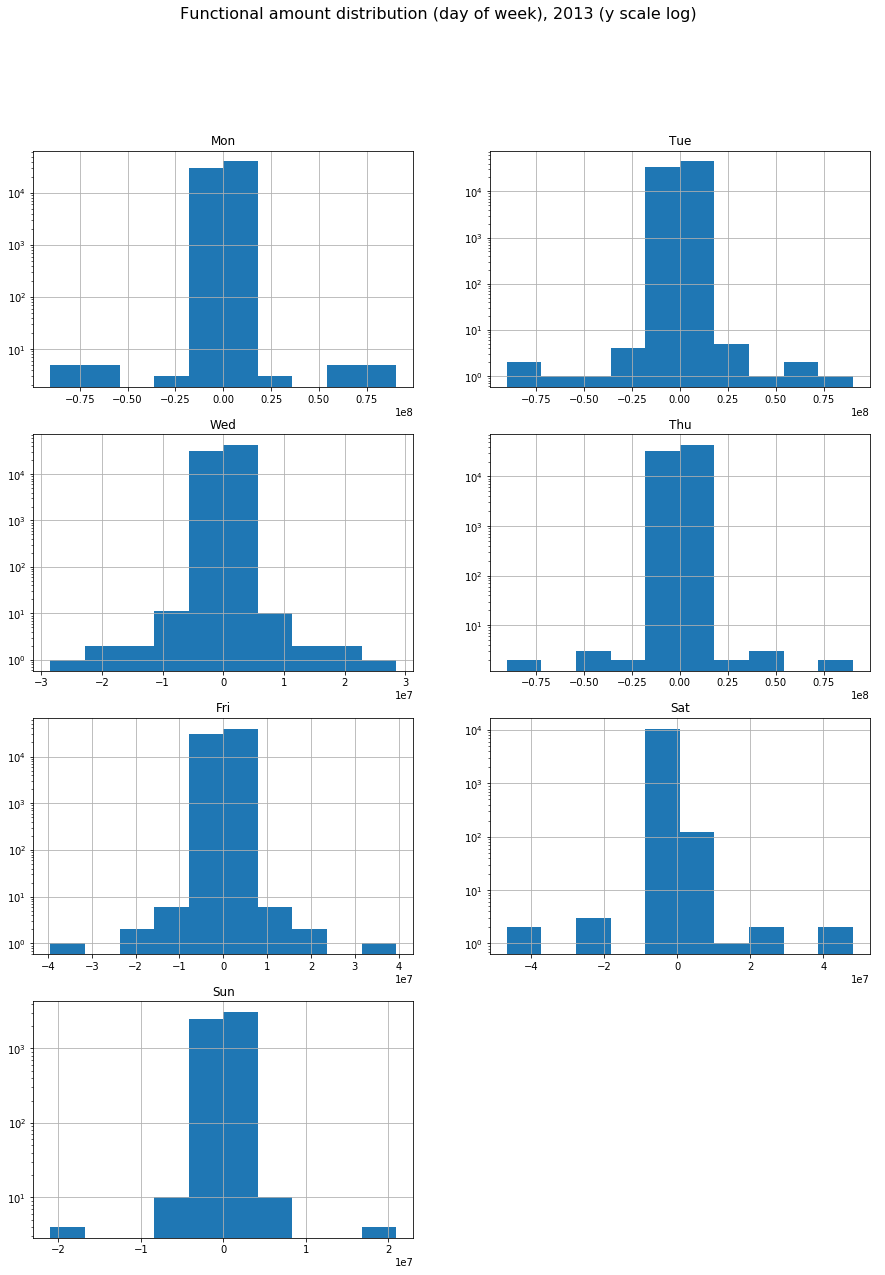

In [18]:
wdays = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
f, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()
plt.yscale("log")
for day in sorted(j13.DOW_effective_date.unique()):
    data = j13.query("DOW_effective_date == @day")["Functional amount"]
    data.hist(bins=10, ax=axes[day]).set_title(wdays[day])
    axes[day].set_yscale("log", nonposy='clip')
    #sns.kdeplot(data, label=day, ax=axes[i])
axes[day + 1].axis('off')
f.suptitle("Functional amount distribution (day of week), 2013 (y scale log)", fontsize=16)

Text(0.5, 0.98, 'Functional amount distribution (day of week), 2014 (y scale log)')

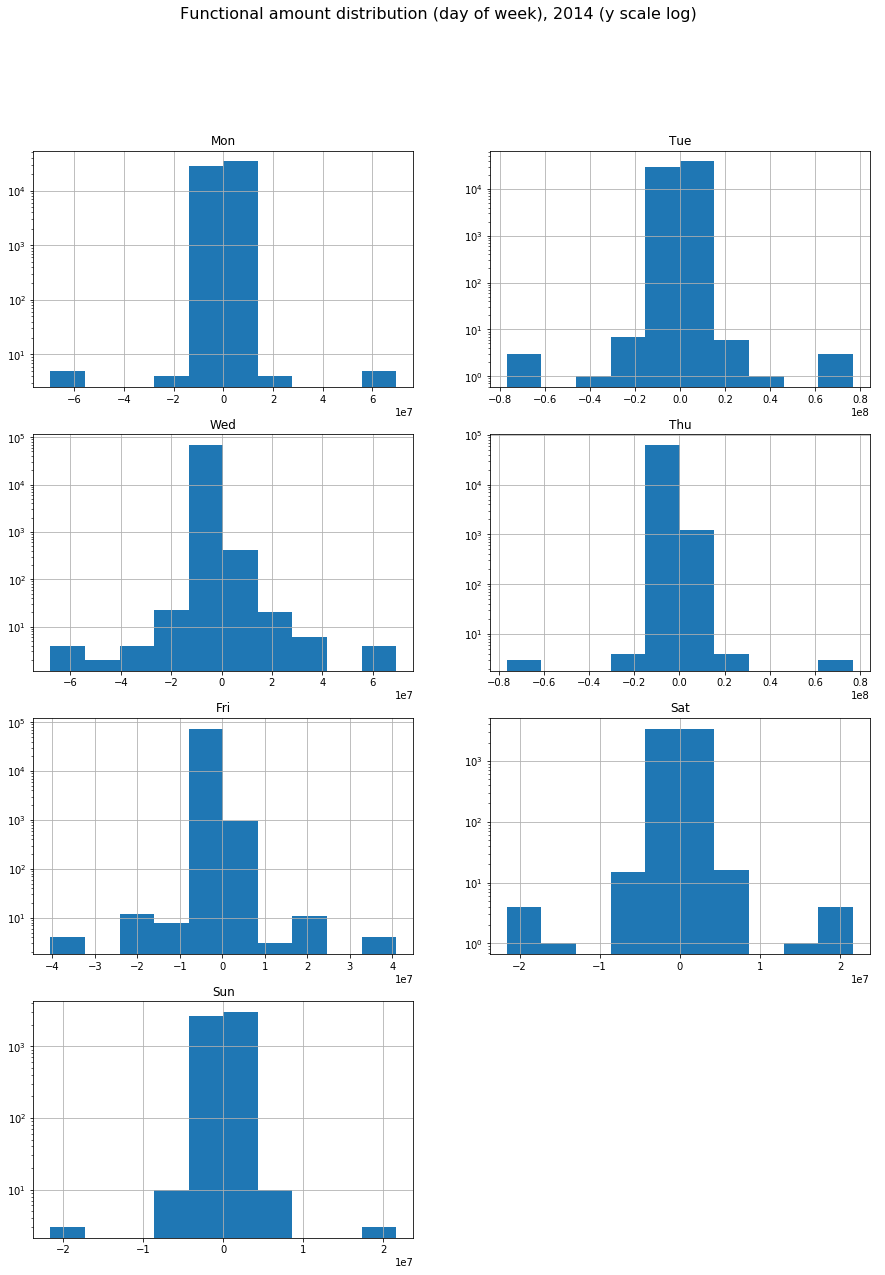

In [20]:
wdays = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
f, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()
plt.yscale("log")
for day in sorted(j14.DOW_effective_date.unique()):
    data = j14.query("DOW_effective_date == @day")["Functional amount"]
    data.hist(bins=10, ax=axes[day]).set_title(wdays[day])
    axes[day].set_yscale("log", nonposy='clip')
    #sns.kdeplot(data, label=day, ax=axes[i])
axes[day + 1].axis('off')
f.suptitle("Functional amount distribution (day of week), 2014 (y scale log)", fontsize=16)

#### Die Struktur von "functional amount" hat sich 2014 im Vergleich zu 2013 verändert.

In [27]:
df.groupby(['Fiscal year', 'DOW_effective_date', 'Source group']).aggregate({'JE number':'count'}).\
rename(columns={'JE number':'n_lines'})

n_lines
Fiscal year DOW_effective_date Source group              
2013        0                  Accruals               128
                               Cash in               6918
                               Cash out              3111
                               Fixed assets            32
                               GL document            646
...                                                   ...
2014        6                  Sales                  477
                               Sales adjustments        4
                               Sales manual             9
                               Transfers              837
                               Wages                 1116

[188 rows x 1 columns]

In [6]:
n_lines_year_group = df.groupby(['Fiscal year', 'Source group']).aggregate({'JE number':'nunique'}).\
rename(columns={'JE number':'n_lines'})

#### Wie hat sich die Anzahl Buchungen für Source groups geändert?
was ist "Source group 1"?

In [7]:
n_lines_year_group.loc[2013].sort_values('n_lines', ascending=False).\
rename(columns={'Source group':'Source_group_2013', 'n_lines':'n_lines_2013'}).\
join(n_lines_year_group.loc[2014].sort_values('n_lines', ascending=False).\
rename(columns={'Source group':'Source_group_2014', 'n_lines':'n_lines_2014'}), how='outer')

,n_lines_2013,n_lines_2014
Source group,,
Accruals,686.0,649
Cash in,11097.0,13386
Cash out,5419.0,5275
Fixed assets,87.0,56
GL document,1458.0,1777
Goods receipts,32709.0,21353
Purchases,17065.0,16484
Receivables adj,12324.0,10982
Sales,16167.0,15692


#### Anzahl Buchungen sortiert absteigend

In [8]:
n_lines_year_group.loc[2013].sort_values('n_lines', ascending=False).reset_index().sort_values('n_lines').\
rename(columns={'Source group':'Source_group_2013', 'n_lines':'n_lines_2013'}).\
join(n_lines_year_group.loc[2014].sort_values('n_lines', ascending=False).reset_index().sort_values('n_lines').\
rename(columns={'Source group':'Source_group_2014', 'n_lines':'n_lines_2014'}), how='outer')

,Source_group_2013,n_lines_2013,Source_group_2014,n_lines_2014
0,Goods receipts,32709.0,Goods receipts,21353
1,Purchases,17065.0,Purchases,16484
2,Sales,16167.0,Sales,15692
3,Receivables adj,12324.0,Cash in,13386
4,Cash in,11097.0,Receivables adj,10982
5,Transfers,6909.0,Transfers,6784
6,Cash out,5419.0,Cash out,5275
7,Sales adjustments,4318.0,Sales adjustments,3845
8,Wages,1482.0,GL document,1777
9,GL document,1458.0,Wages,1477


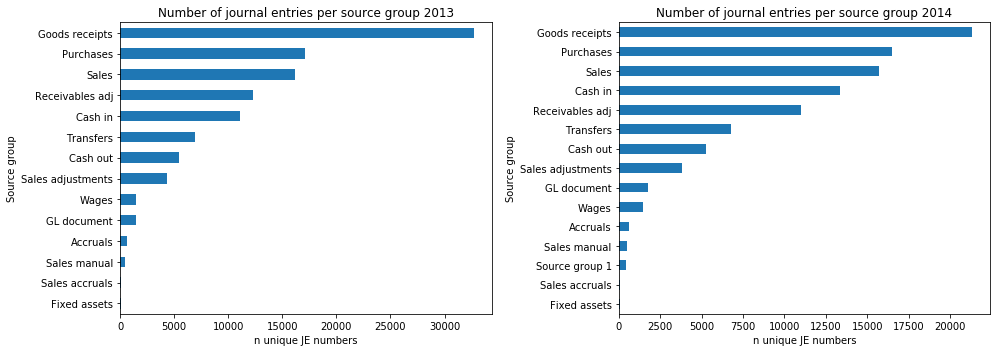

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
n_lines_year_group.loc[2013].sort_values('n_lines', ascending=False)\
.plot(kind="barh", ax=axes[0], legend=False, title="Number of journal entries per source group 2013")
axes[0].invert_yaxis()
axes[0].set(xlabel="n unique JE numbers")
n_lines_year_group.loc[2014].sort_values('n_lines', ascending=False)\
.plot(kind="barh", ax=axes[1], legend=False, title="Number of journal entries per source group 2014")
axes[1].invert_yaxis()
axes[1].set(xlabel="n unique JE numbers")
plt.tight_layout() 

### Outlier detection

In [32]:
dow_amount13 = j13.loc[:, ['DOW_effective_date', 'Functional amount']]
dow_amount14 = j14.loc[:, ['DOW_effective_date', 'Functional amount']]

In [24]:
def plot_decision_fun(clf, normal, outlier, ymin=-1.5e8, ymax=1e8, xlabel="Day of week", ylabel="Functional amount"):
    plt.figure(figsize=(20, 10))
    xx, yy = np.meshgrid(np.linspace(-1, 7, 500), np.linspace(ymin, ymax, 500))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.title("IsolationForest decision boundaries", fontsize = 18)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    b2 = plt.scatter(outlier.iloc[:, 0], outlier.iloc[:, 1], c='red',
                     s=70, edgecolor='k')
    b1 = plt.scatter(normal.iloc[:, 0], normal.iloc[:, 1], c='green',
                     s=70, edgecolor='k')
    #c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
    #                s=20, edgecolor='k')
    plt.axis('tight')
    plt.xlim((-1, 7))
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    #plt.ylim((-5, 5))
    plt.legend([b1, b2],
           ["normal observations",
            "outlier observations"],
           loc="upper left")
    plt.show()

**Angenommen, der Anteil auffälliger Beobachtungen in den Daten beträgt 0.01%.**

In [33]:
clf = IsolationForest(n_estimators=300, contamination=0.0001)#max_samples=200)
clf.fit(dow_amount13)
y_pred_train = clf.predict(dow_amount13)

c:\users\даша\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\users\даша\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [43]:
normal = dow_amount13.iloc[np.where(y_pred_train == 1)].sample(10000)
outlier = dow_amount13.iloc[np.where(y_pred_train == -1)]

### abweichende Beobachtungen im Jahr 2013

Wie man sieht, ist unter getroffener Annahme bei Betrachtung von "Functional amount" und "Day of week" in erster Linie der Wochentag ausschlaggebend: Der "Normalbereich" der Entscheidungsfunktion wird am Sonntag sehr eng, und alle abweichenden Beobachtungen werden von Isolation Forest Algorithmus als Ausreißer klassifiziert.

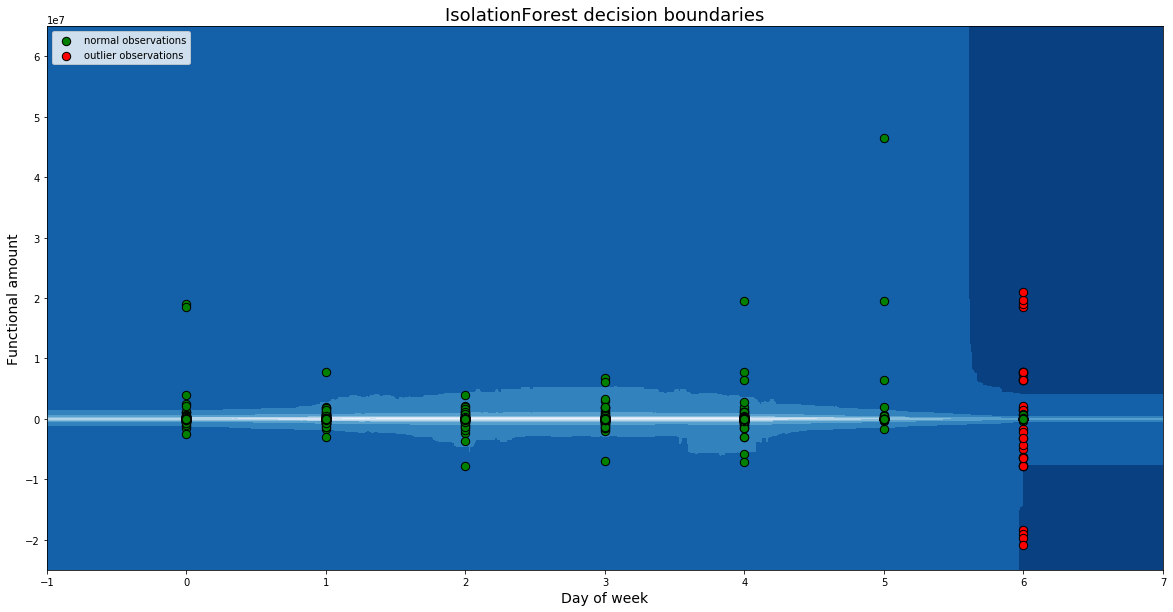

In [44]:
plot_decision_fun(clf, normal, outlier, ymin=-2.5e7, ymax=6.5e7)

In [46]:
clf = IsolationForest(n_estimators=300, contamination=0.0001)#max_samples=200)
clf.fit(dow_amount14)
y_pred_train = clf.predict(dow_amount14)

c:\users\даша\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\users\даша\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [47]:
normal = dow_amount14.iloc[np.where(y_pred_train == 1)].sample(10000)
outlier = dow_amount14.iloc[np.where(y_pred_train == -1)]

### abweichende Beobachtungen im Jahr 2014

Im Jahr 2014 sind auch einige Beobachtungen an Samstagen als Ausreißer klassifiziert worden.

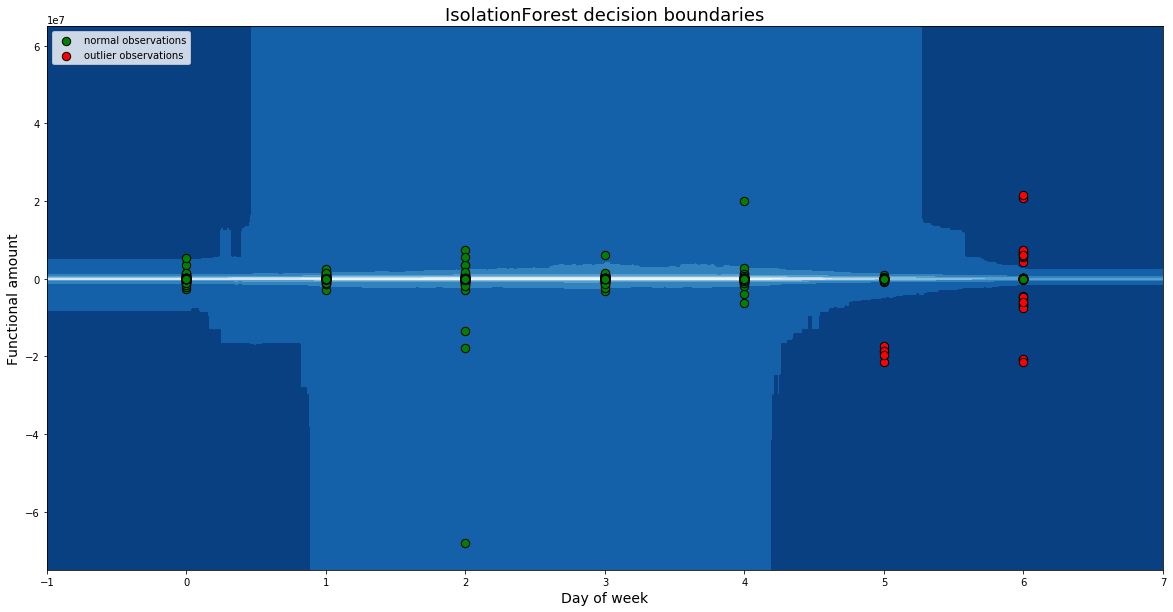

In [50]:

plot_decision_fun(clf, normal, outlier, ymin=-7.5e7, ymax=6.5e7)

In [84]:
dow_amount_source13 = j13.loc[:, ['JE number', 'DOW_effective_date', 'Functional amount', 'Source']]
dow_amount_source14 = j14.loc[:, ['JE number', 'DOW_effective_date', 'Functional amount', 'Source']]

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
enc = LabelEncoder()

In [90]:
dow_amount_source13 = dow_amount_source13.loc[dow_amount_source13["Functional amount"] > 0, :].groupby("JE number").aggregate({"Functional amount":"sum", 
                                                                                                        'DOW_effective_date':"first",
                                                                                                        "Source":"first"})

dow_amount_source14 = dow_amount_source14.loc[dow_amount_source14["Functional amount"] > 0, :].groupby("JE number").aggregate({"Functional amount":"sum", 
                                                                                                        'DOW_effective_date':"first",
                                                                                                        "Source":"first"})

In [91]:
dow_amount_source13["Source"] = enc.fit_transform(dow_amount_source13["Source"])
dow_amount_source14["Source"] = enc.fit_transform(dow_amount_source14["Source"])

In [92]:
clf = IsolationForest(n_estimators=300, contamination=0.0001)#max_samples=200)
clf.fit(dow_amount_source13)
y_pred_train = clf.predict(dow_amount_source13)

c:\users\даша\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\users\даша\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [94]:
y_pred_train[y_pred_train == -1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [95]:
dow_amount_source13["pred"] = y_pred_train

In [108]:
w_pred = dow_amount_source13.loc[dow_amount_source13.pred < 0]

In [109]:
w_pred.reset_index(inplace=True)
w_pred.rename(columns={"Functional amount":"pos_amount_sum", 'DOW_effective_date':'dow'}, inplace=True)

c:\users\даша\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [107]:
j13

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,...,Functional currency code,Business unit code,Business unit,Preparer ID,Preparer department,JE line description,Approver ID,Reversal Indicator,DOW_entry_date,DOW_effective_date
0,2013-0001-0210000003,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
1,2013-0001-0210000003,2,60000113,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
2,2013-0001-0210000003,3,20001102,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
3,2013-0001-0210000006,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,JE Line Description1,EY EMPTY,N,0,4
4,2013-0001-0210000006,2,60000112,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
5,2013-0001-0210000006,3,20001102,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
6,2013-0001-0210000009,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,JE Line Description1,EY EMPTY,N,0,4
7,2013-0001-0210000009,2,60000112,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
8,2013-0001-0210000009,3,60000112,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
9,2013-0001-0210000009,4,60000112,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4


In [110]:
j13.merge(w_pred, on='JE number', how="inner").groupby("JE number").aggregate({"Effective date":"first", "Entry date":"first", 'pos_amount_sum':'first', 'DOW_effective_date':'first'})

,Effective date,Entry date,pos_amount_sum,DOW_effective_date
JE number,,,,
2013-0001-4200025379,2013-03-31,2013-04-10,7114175.12,6
2013-0001-4200031117,2013-06-30,2013-07-10,8035149.62,6
2013-0001-4200054630,2013-12-09,2013-12-10,58000000.00,0
2013-0001-4200055635,2013-12-09,2013-12-11,90000000.00,0
2013-0001-5200060009,2013-03-31,2013-04-07,33598223.86,6
2013-0001-5200060018,2013-06-30,2013-07-07,34368607.94,6
2013-0001-5200060027,2013-09-30,2013-10-07,34997867.86,0
2013-0001-5200070009,2013-04-01,2013-04-07,33598223.86,0
2013-0001-5200070018,2013-07-01,2013-07-07,34368607.94,0


In [7]:
j13.loc[j13["Effective date"] > j13["Entry date"],:]

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,...,Functional currency code,Business unit code,Business unit,Preparer ID,Preparer department,JE line description,Approver ID,Reversal Indicator,DOW_entry_date,DOW_effective_date
17299,2013-0001-2000000075,1,40106000,2013,4,2013-04-30,2013-04-19,AA,AA-Asset posting,Fixed assets,...,EUR,1,ABC Company,IrwJa01,Finance&Admin,JE Line Description1,EY EMPTY,N,4,1
17300,2013-0001-2000000075,2,40107000,2013,4,2013-04-30,2013-04-19,AA,AA-Asset posting,Fixed assets,...,EUR,1,ABC Company,IrwJa01,Finance&Admin,JE Line Description2,EY EMPTY,N,4,1
17333,2013-0001-2000000120,1,40100101,2013,6,2013-06-30,2013-06-26,AA,AA-Asset posting,Fixed assets,...,EUR,1,ABC Company,IrwJa01,Finance&Admin,JE Line Description1,EY EMPTY,N,2,6
17334,2013-0001-2000000120,2,40107000,2013,6,2013-06-30,2013-06-26,AA,AA-Asset posting,Fixed assets,...,EUR,1,ABC Company,IrwJa01,Finance&Admin,JE Line Description2,EY EMPTY,N,2,6
17343,2013-0001-2000000135,1,40015000,2013,7,2013-07-31,2013-07-24,AA,AA-Asset posting,Fixed assets,...,EUR,1,ABC Company,IrwJa01,Finance&Admin,JE Line Description1,EY EMPTY,N,2,2
17344,2013-0001-2000000135,2,40015005,2013,7,2013-07-31,2013-07-24,AA,AA-Asset posting,Fixed assets,...,EUR,1,ABC Company,IrwJa01,Finance&Admin,JE Line Description2,EY EMPTY,N,2,2
17345,2013-0001-2000000135,3,120008000,2013,7,2013-07-31,2013-07-24,AA,AA-Asset posting,Fixed assets,...,EUR,1,ABC Company,IrwJa01,Finance&Admin,JE Line Description3,EY EMPTY,N,2,2
17346,2013-0001-2000000135,4,140900900,2013,7,2013-07-31,2013-07-24,AA,AA-Asset posting,Fixed assets,...,EUR,1,ABC Company,IrwJa01,Finance&Admin,JE Line Description4,EY EMPTY,N,2,2
17347,2013-0001-2000000138,1,40014000,2013,7,2013-07-31,2013-07-24,AA,AA-Asset posting,Fixed assets,...,EUR,1,ABC Company,IrwJa01,Finance&Admin,JE Line Description1,EY EMPTY,N,2,2
17348,2013-0001-2000000138,2,40014005,2013,7,2013-07-31,2013-07-24,AA,AA-Asset posting,Fixed assets,...,EUR,1,ABC Company,IrwJa01,Finance&Admin,JE Line Description2,EY EMPTY,N,2,2


In [ ]:
# effective date > entry date
# effective - entry -> group

In [111]:
df["GL account code"].nunique()

498

In [113]:
df.loc[df["Reversal Indicator"] == "Y", :]

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,Functional amount,Preparer ID,Preparer department,JE line description,Reversal Indicator,DOW_entry_date,DOW_effective_date
21073,2013-0001-2100002475,1,60000004,2013,7,2013-07-17,2013-07-18,FV,FV-Invoice vendors EU,Purchases,-22658.00,ScoDa01,Finance&Admin,NaN,Y,3,2
21074,2013-0001-2100002475,2,140620102,2013,7,2013-07-17,2013-07-18,FV,FV-Invoice vendors EU,Purchases,22658.00,ScoDa01,Finance&Admin,NaN,Y,3,2
21075,2013-0001-2100002475,3,20001103,2013,7,2013-07-17,2013-07-18,FV,FV-Invoice vendors EU,Purchases,-4531.60,ScoDa01,Finance&Admin,NaN,Y,3,2
21076,2013-0001-2100002475,4,20001104,2013,7,2013-07-17,2013-07-18,FV,FV-Invoice vendors EU,Purchases,4531.60,ScoDa01,Finance&Admin,NaN,Y,3,2
21291,2013-0001-2100002631,1,60000004,2013,7,2013-07-31,2013-08-01,FV,FV-Invoice vendors EU,Purchases,22658.00,ScoDa01,Finance&Admin,NaN,Y,3,2
21292,2013-0001-2100002631,2,140620102,2013,7,2013-07-31,2013-08-01,FV,FV-Invoice vendors EU,Purchases,-22658.00,ScoDa01,Finance&Admin,NaN,Y,3,2
21293,2013-0001-2100002631,3,20001103,2013,7,2013-07-31,2013-08-01,FV,FV-Invoice vendors EU,Purchases,4531.60,ScoDa01,Finance&Admin,NaN,Y,3,2
21294,2013-0001-2100002631,4,20001104,2013,7,2013-07-31,2013-08-01,FV,FV-Invoice vendors EU,Purchases,-4531.60,ScoDa01,Finance&Admin,NaN,Y,3,2
26852,2013-0001-2200000771,1,60000003,2013,1,2013-01-28,2013-01-29,FA,FA-Vendor invoice,Purchases,-327056.90,SheAl01,Finance&Admin,NaN,Y,1,0
26853,2013-0001-2200000771,2,60000120,2013,1,2013-01-28,2013-01-29,FA,FA-Vendor invoice,Purchases,270294.96,SheAl01,Finance&Admin,NaN,Y,1,0


In [9]:
j13.head(10)

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,...,Functional currency code,Business unit code,Business unit,Preparer ID,Preparer department,JE line description,Approver ID,Reversal Indicator,DOW_entry_date,DOW_effective_date
0,2013-0001-0210000003,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
1,2013-0001-0210000003,2,60000113,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
2,2013-0001-0210000003,3,20001102,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
3,2013-0001-0210000006,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,JE Line Description1,EY EMPTY,N,0,4
4,2013-0001-0210000006,2,60000112,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
5,2013-0001-0210000006,3,20001102,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
6,2013-0001-0210000009,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,JE Line Description1,EY EMPTY,N,0,4
7,2013-0001-0210000009,2,60000112,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
8,2013-0001-0210000009,3,60000112,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
9,2013-0001-0210000009,4,60000112,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4


In [11]:
chart_of_accounts = pd.read_excel("ABC TB and CoA.xlsx", sheet_name="Chart of Accounts")

In [12]:
chart_of_accounts.head()

,GL account code,GL account name,Account type,Account sub type,Account class,Account sub class,ey_account_group_I,ey_account_group_II,ey_sub_ledger,ey_account_BS_PL,ey_management_account_ind
0,3,EY_EMPTY,Equity,Other equity,EY_EMPTY,EY_EMPTY,NaN,NaN,NaN,BS,NaN
1,63,EY_EMPTY,Equity,Other equity,EY_EMPTY,EY_EMPTY,NaN,NaN,NaN,PL,NaN
2,140520301,Cleaning,Expenses,Cost of sales,Cost of services,Cost of services,NaN,NaN,NaN,PL,NaN
3,140520303,Wastewater disposal,Expenses,Cost of sales,Cost of services,Cost of services,NaN,NaN,NaN,PL,NaN
4,140530102,Rent IT,Expenses,Cost of sales,Costs for use of third party assets,Costs for use of third party assets,NaN,NaN,NaN,PL,NaN


In [18]:
df = pd.concat([j13, j14])

In [19]:
df = df.merge(chart_of_accounts, on="GL account code", how="left")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734623 entries, 0 to 734622
Data columns (total 31 columns):
JE number                    734623 non-null object
JE line number               734623 non-null int64
GL account code              734623 non-null int64
Fiscal year                  734623 non-null int64
Fiscal period                734623 non-null int64
Effective date               734623 non-null object
Entry date                   734623 non-null object
Source code                  734623 non-null object
Source                       734623 non-null object
Source group                 734623 non-null object
Functional amount            734623 non-null float64
Functional currency code     734623 non-null object
Business unit code           734623 non-null int64
Business unit                734623 non-null object
Preparer ID                  734623 non-null object
Preparer department          734623 non-null object
JE line description          184787 non-null object
Approver 

In [33]:
sum13 = df.loc[df['Fiscal year'] == 2013, :].groupby(["Account type", "Account sub type", "Account class"]).aggregate({"Functional amount":"sum"}).rename(columns={"Functional amount":'sum_2013'})
sum14 = df.loc[df['Fiscal year'] == 2014, :].groupby(["Account type", "Account sub type", "Account class"]).aggregate({"Functional amount":"sum"}).rename(columns={"Functional amount":'sum_2014'})

In [35]:
data = sum13.join(sum14).round(2)

In [36]:
data.to_csv('Jahresabschluss.csv')

In [27]:
sum13 = df.loc[df['Fiscal year'] == 2013, :]#.groupby(["Account type", "Account class"]).aggregate({"Functional amount":"sum"}).rename(columns={"Functional amount":'sum_2013'})

In [38]:
df.loc[df["JE number"] == "2013-0001-0210000003", ["GL account code", "Functional amount"]]

,GL account code,Functional amount
0,60000001,-84700.0
1,60000113,70000.0
2,20001102,14700.0


In [47]:
(j13.groupby("GL account code").aggregate({"Functional amount":"sum", "JE number":"count"}).\
rename(columns={"Functional amount":"sum_2013", "JE number":"n_lines_2013"})).\
join(j14.groupby("GL account code").aggregate({"Functional amount":"sum", "JE number":"count"}).\
rename(columns={"Functional amount":"sum_2014", "JE number":"n_lines_2014"})).round(3)


,sum_2013,n_lines_2013,sum_2014,n_lines_2014
GL account code,,,,
20000000,-1186494.90,40141,-13572973.60,39064.0
20000002,-215080.92,1273,-131040.72,1397.0
20000003,-317824.84,170,-56053.56,170.0
20000004,-54615.68,214,-312336.24,209.0
20000005,52929.60,166,-294522.48,160.0
20000006,513014.88,321,745896.76,304.0
20000007,1559142.70,1730,-878529.50,1753.0
20000008,-573.72,139,-0.00,130.0
20000010,-1164156.58,6104,-971677.42,5301.0
